In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
df = pd.read_excel('data.xlsx')
df

,订单ID,商家ID,用户ID,付款日期,使用状态,实付金额,邮费,省份,城市,购买数量
0,S10816,100110,笑嘻佳,2022-02-17 08:09:10.000,1.0,172,0,江苏省,无锡市,1
1,S19000,103840,芽张,2022-04-19 00:24:09.000,1.0,79,0,上海,上海市,1
2,S13184,100017,2天天向上7403,2022-02-22 16:45:20.000,1.0,124,0,辽宁省,盘锦市,1
3,S17539,100180,9chs05,2022-04-13 09:09:07.000,1.0,46,0,福建省,厦门市,2
4,S26017,102464,ejaneinmecn,2022-06-16 21:27:39.000,1.0,186,0,北京,北京市,1
...,...,...,...,...,...,...,...,...,...,...
20178,S28637,105725,0amethystjing27,2022-06-29 09:23:03.588,1.0,74,0,上海,上海市,1
20179,S17731,101642,0萝卜咸菜1,2022-04-18 00:03:58.000,1.0,95,0,北京,北京市,2
20180,S28031,105614,0peiya7,2022-06-24 19:08:46.000,1.0,49,0,上海,上海市,1
20181,S15726,100144,0whh101529,2022-03-21 22:25:12.000,1.0,165,0,河南省,郑州市,1


In [2]:
#df['使用状态'].fillna(-1,inplace=True)
#df.groupby('使用状态')['订单ID'].count()

In [3]:
df.describe()

,商家ID,使用状态,实付金额,邮费,购买数量
count,20183.000000,19829.000000,20183.000000,20183.000000,20183.000000
mean,100846.751177,0.980887,117.006392,0.240450,1.510430
std,1349.805650,0.136927,83.734534,1.378841,1.394554
min,100001.000000,0.000000,-300.000000,0.000000,1.000000
25%,100039.000000,1.000000,65.000000,0.000000,1.000000
50%,100207.000000,1.000000,109.000000,0.000000,1.000000
75%,100927.000000,1.000000,176.000000,0.000000,2.000000
max,105770.000000,1.000000,1028.000000,18.000000,82.000000


### 特征工程

### 1.异常值

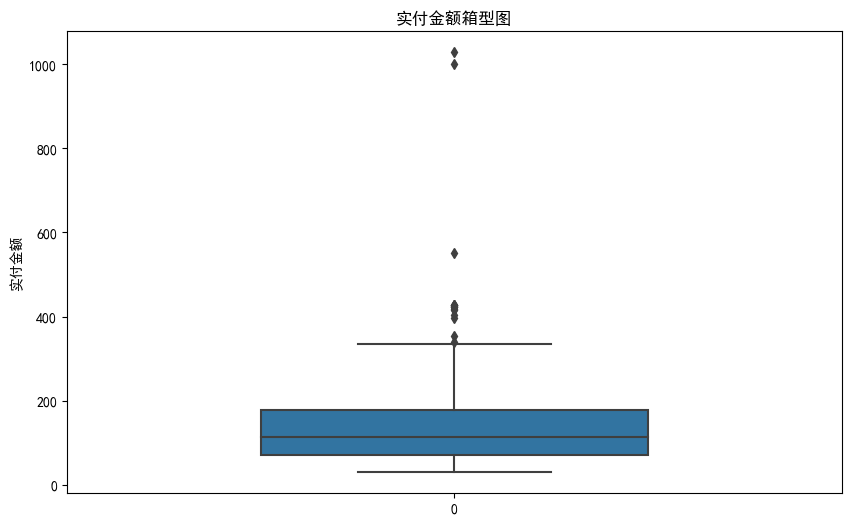

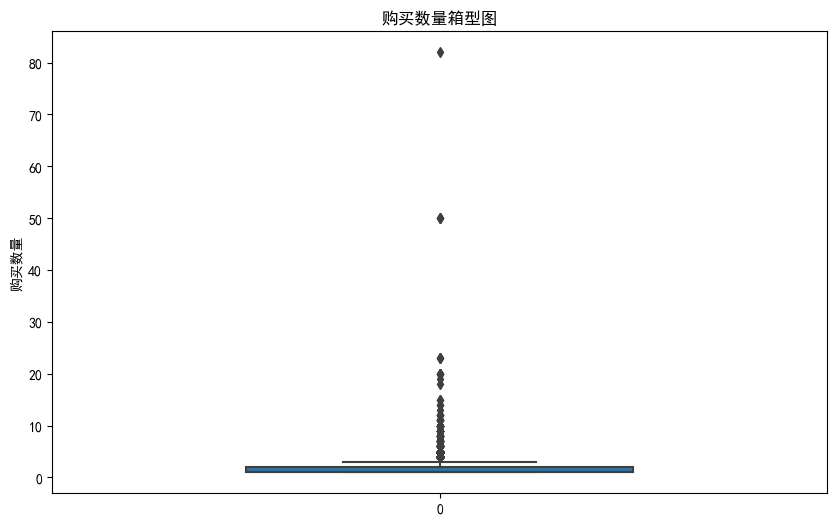

,index,订单ID,商家ID,用户ID,付款日期,使用状态,实付金额,邮费,省份,城市,购买数量
0,0,S10816,100110,笑嘻佳,2022-02-17 08:09:10.000,1.0,172,0,江苏省,无锡市,1
1,1,S19000,103840,芽张,2022-04-19 00:24:09.000,1.0,79,0,上海,上海市,1
2,2,S13184,100017,2天天向上7403,2022-02-22 16:45:20.000,1.0,124,0,辽宁省,盘锦市,1
3,3,S17539,100180,9chs05,2022-04-13 09:09:07.000,1.0,46,0,福建省,厦门市,2
4,4,S26017,102464,ejaneinmecn,2022-06-16 21:27:39.000,1.0,186,0,北京,北京市,1
...,...,...,...,...,...,...,...,...,...,...,...
20165,20178,S28637,105725,0amethystjing27,2022-06-29 09:23:03.588,1.0,74,0,上海,上海市,1
20166,20179,S17731,101642,0萝卜咸菜1,2022-04-18 00:03:58.000,1.0,95,0,北京,北京市,2
20167,20180,S28031,105614,0peiya7,2022-06-24 19:08:46.000,1.0,49,0,上海,上海市,1
20168,20181,S15726,100144,0whh101529,2022-03-21 22:25:12.000,1.0,165,0,河南省,郑州市,1


In [4]:
##通过对数据的观察可以看出，实付金额中存在负数，并且50%的数据并没有达到平均值，75%的金额在存在负数的情况下仅仅比平均值多出60，说明存在大金额抬高平均值
##首先处理大金额异常值，初步判断为刷单行为
##购买数量也存在大幅度的异常值，首先通过购买数量和实付金额去除异常值
df['实付金额'] = np.abs(df['实付金额'])#将负数值转换为正值
#对实付金额绘制箱线图
plt.figure(figsize=(10,6))
sns.boxplot(df['实付金额'],orient='v',width = 0.5)
plt.ylabel('实付金额')
plt.title('实付金额箱型图')
#plt.savefig('./箱型图1.jpg')
plt.show()
# 通过图像可以看出存在异常大金额数据，查看此类数据
#df[df['实付金额']>400]

##对购买数量绘制箱型图
plt.figure(figsize=(10,6))
sns.boxplot(df['购买数量'],orient='v',width=0.5)
plt.ylabel('购买数量')
plt.title('购买数量箱型图')
#plt.savefig('./箱型图2.jpg')
plt.show()

df[df['购买数量']>15]
#通过对数据的查看可知，大多数购买大金额用户为小KK铺，并且时间大多数都在同一天，疑似刷单行为，故删除此用户的订单
indexNames = df[df['用户ID'] =='小kk铺'].index
df.drop(indexNames,inplace=True)
#其他用户购买数据均为正常数据，故保留
#查看邮费，时间数据是否出现异常
df[df['邮费']<0].count()
df['邮费'].max()
#结果为0，不存在异常值,最大值也在合理的范围内
#df['付款日期'].max()
df['付款日期'].min()
#可知数据是2022-1-1 ~ 2022-6-30 半年内的数据，并无异常
#重置索引
df.reset_index()

### 2.缺失值

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20170 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单ID    20170 non-null  object        
 1   商家ID    20170 non-null  int64         
 2   用户ID    20170 non-null  object        
 3   付款日期    20170 non-null  datetime64[ns]
 4   使用状态    19817 non-null  float64       
 5   实付金额    20170 non-null  int64         
 6   邮费      20170 non-null  int64         
 7   省份      20170 non-null  object        
 8   城市      20170 non-null  object        
 9   购买数量    20170 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 1.7+ MB


In [6]:
### 根据信息得知，未领取优惠卷的用户在使用情况为空,故给予-1视为未领取，方便后续可视化
df['使用状态'].fillna(-1,inplace=True)

### 3.重复值

In [7]:
#用户不能在同一时间下单相同订单号的相同货物，故去掉重复之
df.drop_duplicates(['订单ID','付款日期'],inplace=True)

### 4.构造时间特征

In [8]:
df['日期_月'] = df['付款日期'].apply(lambda x :x.month)
df['日期_天'] = df['付款日期'].apply(lambda x :x.day)
df['日期_小时'] = df['付款日期'].apply(lambda x : x.hour)

### 5.商户特征构建

In [9]:
###构建商户特征：每个商户的交易次数，每个商户在销售中使用优惠卷交易的次数，每个用户商户优惠卷的总数，用户发放优惠卷的使用率
df_s=df.groupby('商家ID')['付款日期'].count().reset_index()
df_s.columns = ['商家ID','交易次数']
df_sy = df.groupby('商家ID')['使用状态'].value_counts().unstack()
df_sy.fillna(0,inplace=True)
df_sy.columns = ['未领取','领取未使用','领取已使用']
df_sy['优惠卷发放总数'] = df_sy['领取未使用'] + df_sy['领取已使用']
df_sy['优惠卷发放使用率'] = df_sy['领取已使用']/df_sy["优惠卷发放总数"]
df_sy['未领取优惠卷占比'] = df_sy['未领取'] / (df_sy['未领取'] + df_sy['优惠卷发放总数'])
#将此类特征整合到总数据中
df = df.merge(df_sy,on='商家ID',how = 'inner')
df_sy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4723 entries, 100001 to 105770
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   未领取       4723 non-null   float64
 1   领取未使用     4723 non-null   float64
 2   领取已使用     4723 non-null   float64
 3   优惠卷发放总数   4723 non-null   float64
 4   优惠卷发放使用率  4681 non-null   float64
 5   未领取优惠卷占比  4723 non-null   float64
dtypes: float64(6)
memory usage: 258.3 KB


### 6.用户特征构建

In [10]:
#df_u = df.groupby('用户ID')['付款日期'].count().reset_index()
#df_u.columns = ['用户ID','购买次数']
df_u = df.groupby('用户ID')['使用状态'].value_counts().unstack()
df_u = df_u.fillna(0)
df_u.columns = ['用户未领取优惠卷','用户领取未使用优惠卷','用户使用优惠卷']
df_u['用户购买总数'] = df_u.sum(axis = 1)
df_u['用户优惠卷使用率'] = df_u['用户使用优惠卷'] / df_u['用户购买总数']
df_u['用户优惠卷未使用率'] = df_u['用户领取未使用优惠卷']/df_u['用户购买总数']
df_u['用户未领取优惠卷占比'] = df_u['用户未领取优惠卷'] / df_u['用户购买总数']
df = df.merge(df_u,on = '用户ID',how='inner')
df_u

,用户未领取优惠卷,用户领取未使用优惠卷,用户使用优惠卷,用户购买总数,用户优惠卷使用率,用户优惠卷未使用率,用户未领取优惠卷占比
用户ID,,,,,,,
.blue_ram,0.0,0.0,1.0,1.0,1.0,0.0,0.0
.christiny,0.0,0.0,1.0,1.0,1.0,0.0,0.0
.托托m,0.0,0.0,1.0,1.0,1.0,0.0,0.0
0000妮,0.0,0.0,1.0,1.0,1.0,0.0,0.0
000xyx0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
龙小鱼潭,0.0,0.0,1.0,1.0,1.0,0.0,0.0
龙温暖猫,0.0,0.0,1.0,1.0,1.0,0.0,0.0
龙火师,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [11]:
#去除多余特征

df.columns
df.drop(['未领取','领取未使用','领取已使用','优惠卷发放总数','用户未领取优惠卷','用户领取未使用优惠卷','用户使用优惠卷','用户购买总数'],axis = 1,inplace = True)
df

,订单ID,商家ID,用户ID,付款日期,使用状态,实付金额,邮费,省份,城市,购买数量,日期_月,日期_天,日期_小时,优惠卷发放使用率,未领取优惠卷占比,用户优惠卷使用率,用户优惠卷未使用率,用户未领取优惠卷占比
0,S10816,100110,笑嘻佳,2022-02-17 08:09:10.000,1.0,172,0,江苏省,无锡市,1,2,17,8,1.0,0.0,1.0,0.0,0.0
1,S12525,100244,笑嘻佳,2022-02-19 00:07:55.000,1.0,192,0,江苏省,苏州市,1,2,19,0,1.0,0.0,1.0,0.0,0.0
2,S26273,100286,笑嘻佳,2022-06-17 09:50:14.078,1.0,42,0,江苏省,无锡市,3,6,17,9,1.0,0.0,1.0,0.0,0.0
3,S4612,100110,ynej7,2022-01-14 16:44:10.613,1.0,253,0,浙江省,杭州市,1,1,14,16,1.0,0.0,1.0,0.0,0.0
4,S13542,100110,加breez菲,2022-02-28 11:49:48.000,1.0,138,0,黑龙江省,哈尔滨市,2,2,28,11,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,S17748,103616,ooh笑h,2022-04-18 00:04:50.000,1.0,87,0,上海,上海市,1,4,18,0,1.0,0.0,1.0,0.0,0.0
20166,S22753,104547,2tb66429,2022-05-27 17:25:57.000,1.0,99,0,上海,上海市,1,5,27,17,1.0,0.0,1.0,0.0,0.0
20167,S20528,104127,0duckduck17,2022-05-08 13:58:20.000,1.0,123,0,上海,上海市,3,5,8,13,1.0,0.0,1.0,0.0,0.0
20168,S28637,105725,0amethystjing27,2022-06-29 09:23:03.588,1.0,74,0,上海,上海市,1,6,29,9,1.0,0.0,1.0,0.0,0.0


### 对用户的消费行为进行统计分析并可视化

### 1.用户消费时间维度

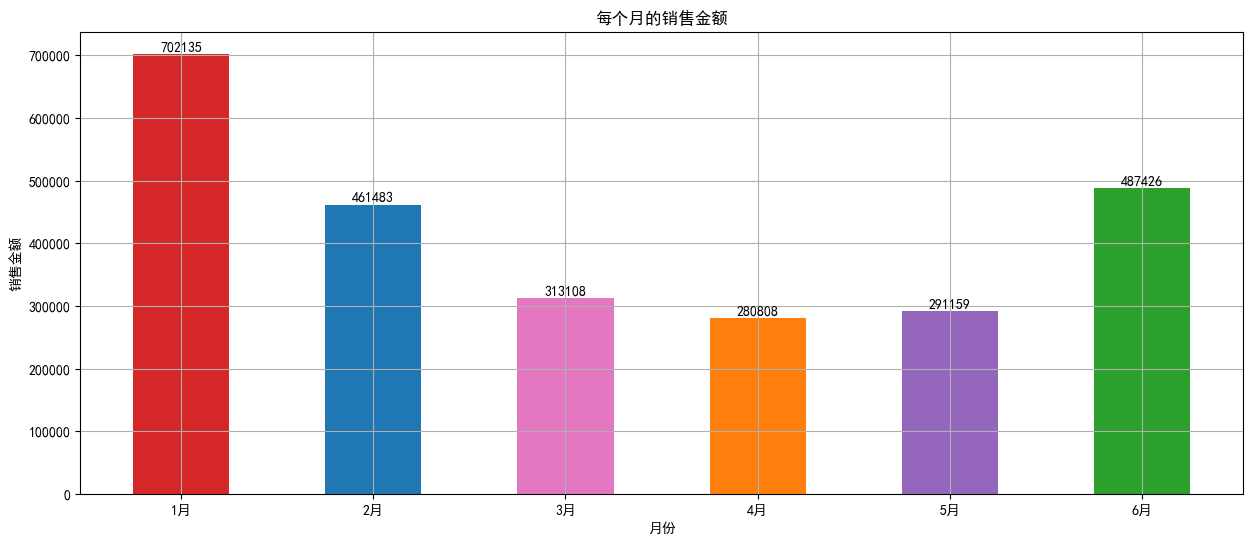

In [12]:
### 统计用户在哪几个月消费水平比较高
df_m = df.groupby('日期_月')['实付金额'].sum().reset_index()

plt.figure(figsize=(15,6))
plt.bar(x = df_m.index+1,height=df_m['实付金额'],width=0.5, color = ['tab:red', 'tab:blue', 'tab:pink', 'tab:orange','tab:purple','tab:green'])
plt.xlabel('月份')
plt.ylabel('销售金额')
plt.title('每个月的销售金额')
plt.xticks(range(1,7),['1月','2月','3月','4月','5月','6月'])
plt.grid()
for x,y in enumerate(df_m['实付金额']):
    plt.text(x+1,y+5000,y,ha='center',fontsize=10)
#plt.savefig('月份销售额')
plt.show()
#根据分析可知，用户在1月消费金额明显高于其他月份，2月份稍微高于其他月份，原因分析可能为过年期间为用户购买高峰期，其次为1，2月优惠力度比以往大，春节促销。6月份的销售金额也要稍微高于其他月份，推测为618促销或其他优惠活动导致销售金额增加。

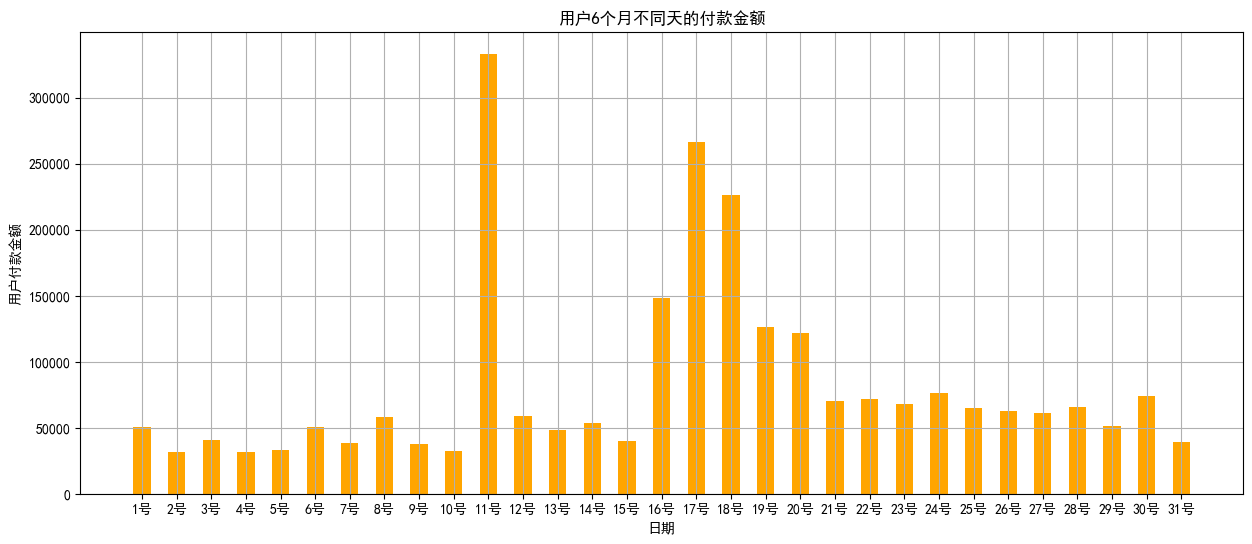

In [13]:
### 统计用户在一个月中那一天消费水平较高
df_d = df.groupby('日期_天')['实付金额'].sum().reset_index()
plt.figure(figsize=(15,6))
plt.bar(x=range(1,32),height=df_d['实付金额'],color = 'orange',width=0.5)
plt.xlabel('日期')
plt.ylabel('用户付款金额')
plt.title('用户6个月不同天的付款金额')
df_d['日期_天'] = df_d['日期_天'].apply(lambda x : str(x)+"号")
plt.xticks(range(1,32),df_d['日期_天'])
plt.grid()
#plt.savefig('天数习惯')
#根据结果可视化可以看出，在16~20号之间，付款金额上升，估计原因是大多数公司在每个月15号或16号结算工资，导致未来一段时间消费金额上升，11号实付金额远超于其他时间，推算是过年期间，或618活动当天导致的营业额上升

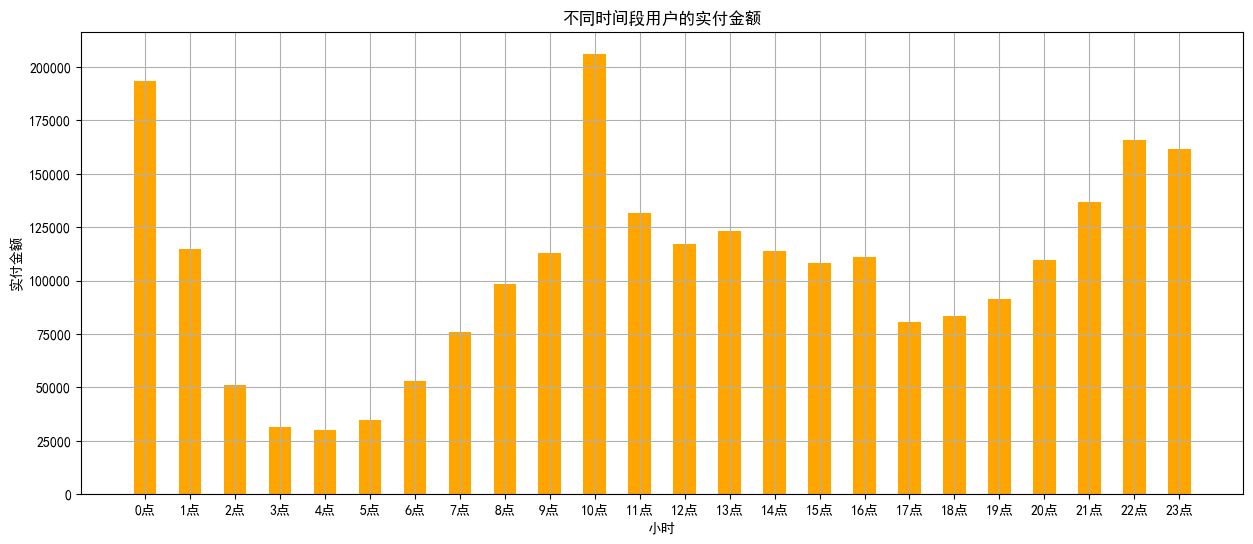

In [14]:
###统计用户在每天什么时间段喜爱消费
df_hour = df.groupby('日期_小时')['实付金额'].sum().reset_index()
plt.figure(figsize=(15,6))
plt.bar(x = range(24),height=df_hour['实付金额'],width = 0.5,color = 'orange')
plt.xlabel('小时')
plt.ylabel('实付金额')
plt.title('不同时间段用户的实付金额')
df_hour['日期_小时'] = df_hour['日期_小时'].apply(lambda x : str(x) + '点')
plt.xticks(range(24),df_hour['日期_小时'])
plt.grid()
#plt.savefig('用户小时习惯')
#通过可视化可以看出，用户在每天凌晨0点和1点呈现一个短暂的高峰，预计是0点开始抢票，或熬夜购物。在早上10点出现第二个高峰，然后下降，此现象预计是10点开始预约抢购，导致10点营业额上升。
#在10点以后呈现大幅度下降，一直到17点，逐渐缓慢上升，原因可能是用户下班休息。

### 2.用户消费地区分布

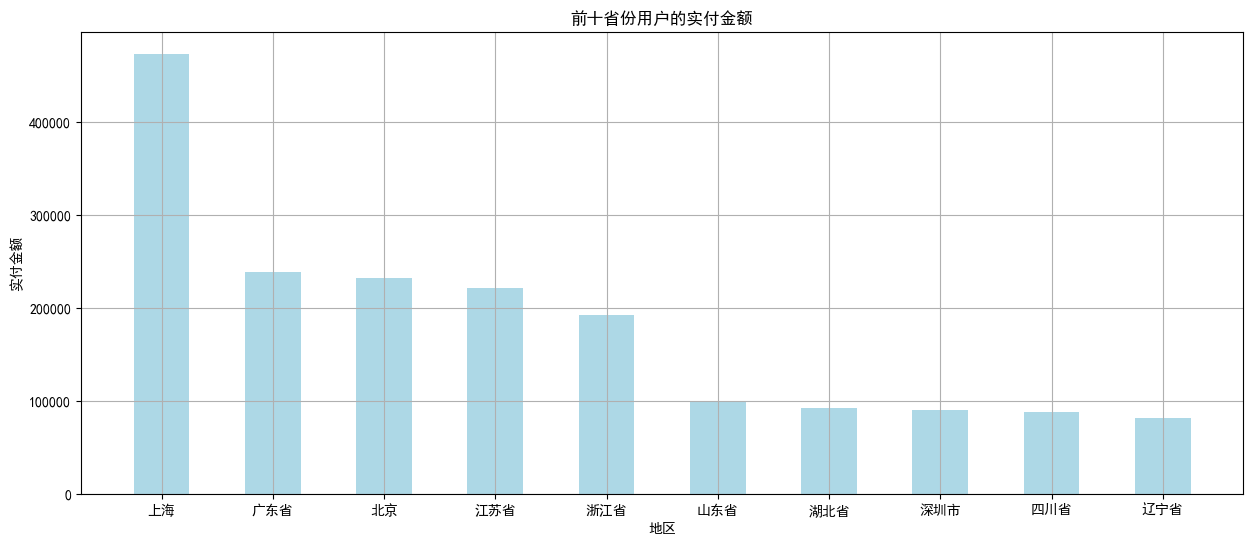

In [15]:
for i in range(len(df['省份'])):
    if df.iloc[i,8] =='深圳市':
        df.iloc[i,7] = '深圳市'
df_city = df.groupby('省份')['实付金额'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(15,6))
plt.bar(range(10),height=df_city.iloc[:10,1],width=0.5,color = 'lightblue')
plt.xlabel('地区')
plt.ylabel('实付金额')
plt.title('前十省份用户的实付金额')
plt.xticks(range(10),df_city.iloc[:10,0])
plt.grid()
#plt.savefig('前十省份实付金额.jpg')
plt.show()
#由于深圳也被包含在广东省之内了，故将其单独取出
#根据可视化显示，大多数消费金额贡献来源于一线城市，北上广，江浙沪等一带地区，其余城市相比这些城市消费金额要少于一半。

### 3.用户使用优惠卷分析

Text(0.5, 1.0, '用户使用优惠卷情况')

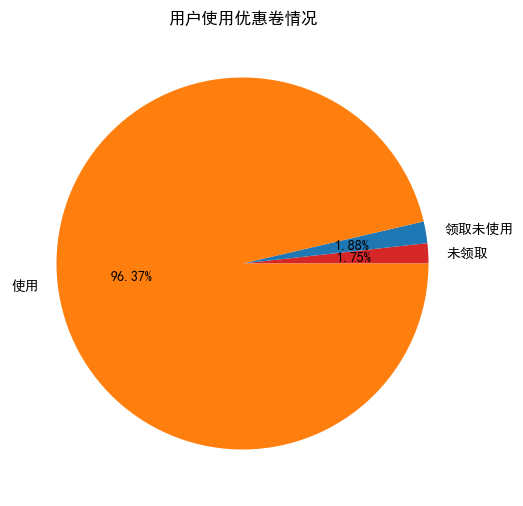

In [16]:
buy_sum = df_u['用户购买总数'].sum()
t1 = df_u['用户未领取优惠卷'].sum()/buy_sum
t2 = df_u['用户领取未使用优惠卷'].sum()/buy_sum
t3 = df_u['用户使用优惠卷'].sum()/buy_sum
plt.figure(figsize=(6,8))
plt.pie(x = [t1,t2,t3],labels=['未领取','领取未使用','使用'],autopct='%.2f%%',colors=['tab:red', 'tab:blue', 'tab:orange'])
plt.title("用户使用优惠卷情况")
#plt.savefig('用书使用优惠券情况.jpg')
#可以看出大部分用户都是喜欢购买时使用优惠卷，极少部分用户未领取和未使用，未领取和未使用的用户相差不大，可以规整到一类用户
#未领取优惠卷可能是觉得麻烦或忽略了优惠劵，可以向此类用户展现优惠力度和领取方法。
#用户领取未使用可能是觉得优惠力度比较低，由于下单时大部分优惠卷会自动使用，用户未使用可能是没有满足条件。

### 4.用户购买数量分析

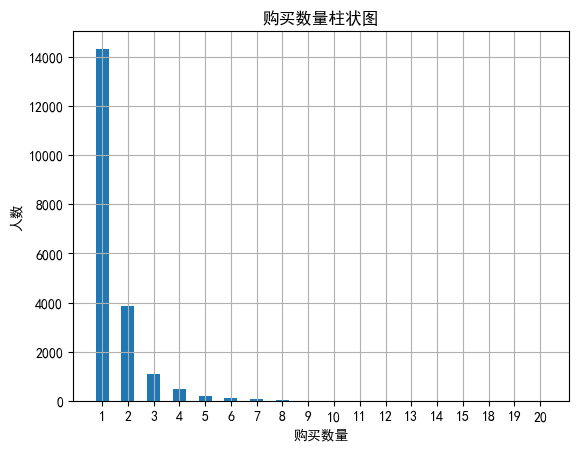

In [17]:
df_count = df.groupby('购买数量')['付款日期'].count().reset_index()
plt.bar(x = range(len(df_count['付款日期'])),height=df_count['付款日期'],width=0.5)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买数量柱状图')
plt.xticks(range(len(df_count['付款日期'])),df_count['购买数量'])
plt.grid()
#plt.savefig('购买数量.jpg')
#通过购买数量图可以看出，绝大部分用户只购买一件商品，少部分用户购买2-4件商品，极少部分用户选择购买很多
#分析原因：可能由于商品性质的原因，尽可以购买一件，也有可能是用户的消费理念是先购买一个，如果好用再继续加购，购买多的用户可能是老客户或购买小物件

### 5.用户在同家店铺购买情况分析

Text(0.5, 1.0, '用户在同一店铺购买次数占比')

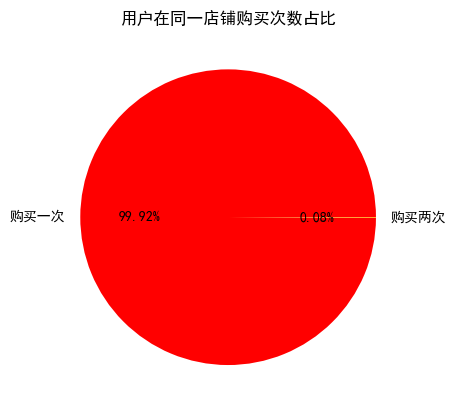

In [18]:
df_ub = pd.DataFrame(df.groupby('用户ID')['商家ID'].value_counts().value_counts())
df_ub.columns = ['重复店铺购买次数']
plt.pie(x = df_ub['重复店铺购买次数'],labels = ['购买一次','购买两次'],autopct="%.2f%%",colors = ['red','orange'])
plt.title('用户在同一店铺购买次数占比')
#plt.savefig('用户重复购买次数占比.jpg')
#根据结果可知，用户购买商品除非是仅需要一次的商品之外，很少有在同一家店重复购买的习惯
#可能是优惠卷仅可使用一次，其他店铺相比更加便宜或商品没有满足客户需求。


### 6.用户购买频率分析

,用户ID,购买次数
0,.blue_ram,1
1,.christiny,1
2,.托托m,1
3,0000妮,1
4,000xyx0,1
...,...,...
18711,龙小鱼潭,1
18712,龙温暖猫,1
18713,龙火师,1
18714,龟mil宝,1


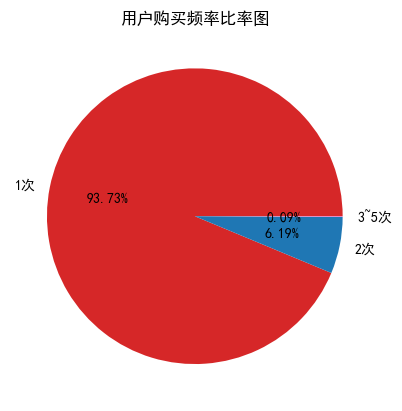

In [19]:
### 统计用户购买频率
df_date = df.groupby('用户ID')['付款日期'].count().reset_index()
df_date.columns = ['用户ID','购买次数']
c = df_date['购买次数'].value_counts()
c[3] =c[4]+c[5]
c= c[:3]
#plt.figure(figsize=(10,10))
plt.pie(x = c,labels = ['1次','2次','3~5次'],autopct='%.2f%%',colors = ['tab:red', 'tab:blue', 'tab:pink'])
plt.title('用户购买频率比率图')
#plt.savefig('用户购买频率.jpg')
#从图中可以看出，大部分用户消费频率不是很高，半年内的数据仅购买一次，仅有少量用户是在半年内购买了2次商品，极少数用户购买了3~5次商品
#通过数据的可视化可以看出，大多数用户的消费频率都不是很高
df_date

### 7.用户消费水平分析

([<matplotlib.axis.XTick at 0x1336e9788c8>,
 [Text(0, 0, '低消费'), Text(1, 0, '中消费'), Text(2, 0, '高消费')])

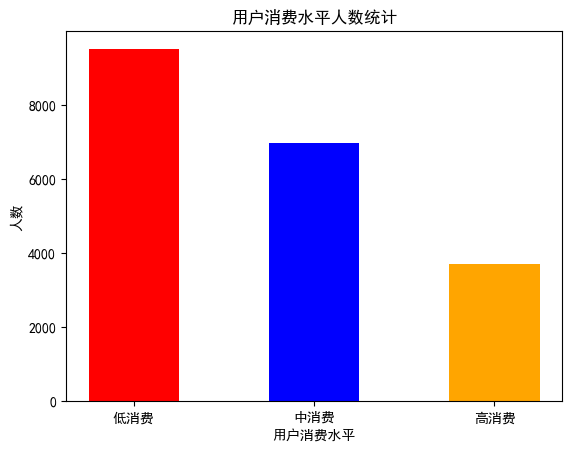

In [20]:
### 根据区间查看用户的消费水平，0~100称为低消费，100~200成为中等消费，200以上称之为高消费，统计不同消费区间的人数
ls= [0,0,0] #索引0为低消费，1为中等消费，2为高消费
#plt.figure(figsize=(10,6))
for i in range(len(df['实付金额'])):
    if df.iloc[i,5]>0 and df.iloc[i,5]<=100:
        ls[0] +=1
    elif df.iloc[i,5]>100 and df.iloc[i,5]<=200:
        ls[1]+=1
    else:
        ls[2]+=1
plt.bar(x = range(3),height=ls,width=0.5,color = ['red','blue','orange'])
plt.xlabel('用户消费水平')
plt.ylabel('人数')
plt.title('用户消费水平人数统计')
plt.xticks(range(3),['低消费','中消费','高消费'])
#plt.savefig('用户消费水平.jpg')
#plt.legend()
#可见消费水平是一个递减的程度，低消费水平的人数占大多数，但并不是绝对的优势，中高消费人数总和还是要多于低消费人数，在照顾到低消费人群的前提下，还是有必要更好的服务中高消费人群

### 客户价值分析

In [21]:
## 由于大多数用户目前为止仅消费了一次，如果用CLV模型预测用户群的价值会导致大部分用户偏向同一类，故不采取这种方案
## 针对RFM模型，我们以7.30号为当前日期，很多用户消费仅一次，不代表之后不会继续购物，举例这个日期越近的客户，下一次消费的概率就会越大，因为长时间未消费，之后也未必会完成消费。
import datetime
t = pd.to_datetime('2022-07-30')
df['R'] = np.int32((t-df['付款日期'])/np.timedelta64(1,'D'))
df_date.columns = ['用户ID','F']
df = df.merge(df_date,on='用户ID',how = 'inner')
df_M = df.groupby('用户ID')['实付金额'].sum().reset_index()
df_M.columns=['用户ID','M']
df = df.merge(df_M,on = '用户ID',how='inner')

In [22]:
df_date1 = df.groupby('用户ID')['R'].max()
df.drop('R',axis = 1,inplace=True)
df = df.merge(df_date1,on = '用户ID',how='inner')


In [23]:
df_RFM = df.drop_duplicates('用户ID')
df_RFM = df_RFM.iloc[:,len(df_RFM.columns)-3:]
df_RFM['用户ID'] = df['用户ID']
df_RFM.reset_index(inplace=True)
df_RFM.drop('index',axis = 1,inplace=True)
def rfm_fun(x):
    level = x.apply(lambda x : '1' if x>=0 else '0')
    label = level['R'] + level['F'] + level['M']  #举例 001 100
    d = {'111':'重要价值客户',
         '011':'重要保持客户',
         '101':'重要发展客户',
         '001':'重要挽留客户',
         '110':'一般价值客户',
         '010':'一般保持客户',
         '000':'一般挽留客户',
         '100':'一般发展客户'}
    result = d[label]
    return result
    return 
df_RFM['客户标签'] = df_RFM[['R','F','M']].apply(lambda x : x-x.mean()).apply(rfm_fun,axis = 1)
ls1 = df_RFM['客户标签'].value_counts()
ls1

一般发展客户    5593
一般挽留客户    4460
重要发展客户    3734
重要挽留客户    3636
重要价值客户     826
重要保持客户     237
一般价值客户     177
一般保持客户      53
Name: 客户标签, dtype: int64

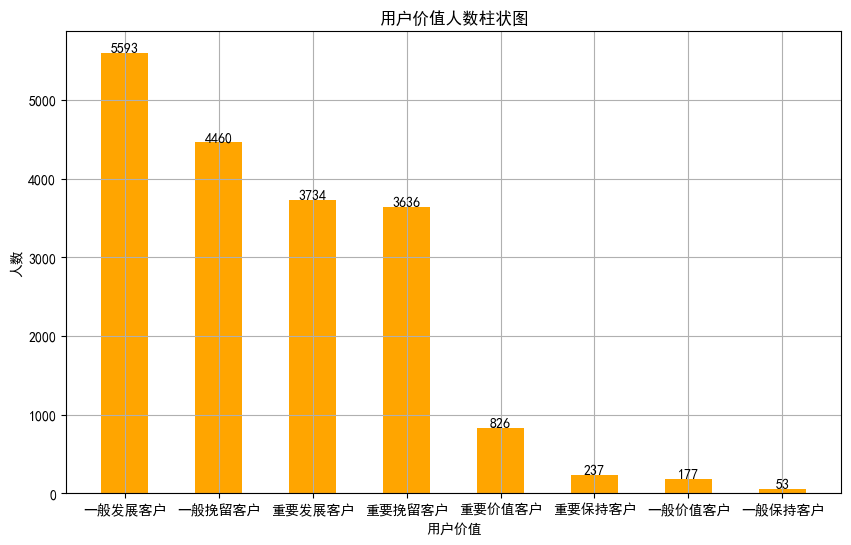

In [24]:
plt.figure(figsize=(10,6))
plt.bar(x = range(len(ls1)),height=ls1,width=0.5,color = 'orange')
plt.xlabel('用户价值')
plt.ylabel('人数')
plt.title('用户价值人数柱状图')
plt.grid()
plt.xticks(range(len(ls1)),ls1.index)
for x ,y in enumerate(ls1):
    plt.text(x,y+10,y,fontsize=10,ha ='center')
#plt.savefig('RFM.jpg')
#根据结果分析，尽管大部分用户都是一般发展和一般挽留用户，不过针对于重要的客户在图形中的剧中地区，而且数值并不算很稀少，所以针对此类用户要做好维护工作，尽可能的挽留发展
#针对一般发展和一般挽留客户，由于人数是大基数，所以要做好针对性服务。

### 用户画像

In [25]:
df

,订单ID,商家ID,用户ID,付款日期,使用状态,实付金额,邮费,省份,城市,购买数量,...,日期_天,日期_小时,优惠卷发放使用率,未领取优惠卷占比,用户优惠卷使用率,用户优惠卷未使用率,用户未领取优惠卷占比,F,M,R
0,S10816,100110,笑嘻佳,2022-02-17 08:09:10.000,1.0,172,0,江苏省,无锡市,1,...,17,8,1.0,0.0,1.0,0.0,0.0,3,406,162
1,S12525,100244,笑嘻佳,2022-02-19 00:07:55.000,1.0,192,0,江苏省,苏州市,1,...,19,0,1.0,0.0,1.0,0.0,0.0,3,406,162
2,S26273,100286,笑嘻佳,2022-06-17 09:50:14.078,1.0,42,0,江苏省,无锡市,3,...,17,9,1.0,0.0,1.0,0.0,0.0,3,406,162
3,S4612,100110,ynej7,2022-01-14 16:44:10.613,1.0,253,0,浙江省,杭州市,1,...,14,16,1.0,0.0,1.0,0.0,0.0,1,253,196
4,S13542,100110,加breez菲,2022-02-28 11:49:48.000,1.0,138,0,黑龙江省,哈尔滨市,2,...,28,11,1.0,0.0,1.0,0.0,0.0,1,138,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,S17748,103616,ooh笑h,2022-04-18 00:04:50.000,1.0,87,0,上海,上海市,1,...,18,0,1.0,0.0,1.0,0.0,0.0,1,87,102
20166,S22753,104547,2tb66429,2022-05-27 17:25:57.000,1.0,99,0,上海,上海市,1,...,27,17,1.0,0.0,1.0,0.0,0.0,1,99,63
20167,S20528,104127,0duckduck17,2022-05-08 13:58:20.000,1.0,123,0,上海,上海市,3,...,8,13,1.0,0.0,1.0,0.0,0.0,1,123,82
20168,S28637,105725,0amethystjing27,2022-06-29 09:23:03.588,1.0,74,0,上海,上海市,1,...,29,9,1.0,0.0,1.0,0.0,0.0,1,74,30


In [26]:
### 根据用户的消费金额，消费时间，消费次数，使用优惠卷情况，地区等属性进行用户画像
#0~100称为低消费，100~200成为中等消费，200以上称之为高消费
df_profile = df.loc[:,['用户ID']]
df_profile['消费偏好_D'] = df['日期_天'].apply(lambda x : '喜欢在月初进行消费' if x<=10 else '喜欢在月中进行消费' if x>10 and x<=20 else '喜欢在月末进行消费')
df_profile['消费偏好_H'] = df['日期_小时'].apply(lambda x : '喜欢在上午进行消费' if x>6 and x<=12 else '喜欢在下午进行消费' if x>12 and x<=19 else '喜欢在夜晚进行消费')
df_profile['用户消费频次'] = df['F'].apply(lambda x : '高频' if x>=3 else '中频' if x==2 else '低频') 
df_profile['消费力度'] = df['M'].apply(lambda x : '高消费用户' if x>200 else '中消费用户' if x>100 and x<=200 else  '低消费用户')
#df_profile.drop_duplicates(['用户ID','消费偏好_D'],keep = 'first')

In [27]:
df_b = df_profile.groupby('用户ID')['消费偏好_H'].value_counts().unstack()
df_b.fillna(0,inplace=True)
#for i in range(len(df_b.index)):
#df_b['消费情况'] = df['喜欢在上午消费']
df_b['消费偏好'] = df_b.apply(lambda x : '喜欢在上午进行消费' if x.max() == x[0] else '喜欢在中午进行消费' if x.max()==x[1] else '喜欢在下午进行消费',axis = 1)
df_b = df_b.loc[:,'消费偏好']

In [28]:
df_profile.drop('消费偏好_H',axis = 1,inplace=True)
df_profile=df_profile.merge(df_b,on='用户ID',how = 'inner')
df_profile.drop_duplicates('用户ID',inplace=True)
df['用户所在地'] = df.apply(lambda x : x.loc['城市'] if x.loc['省份']+'市' == x.loc['城市'] else x.loc['省份']+x.loc['城市'],axis = 1)
df_profile = df_profile.merge(df.loc[:,['用户ID','用户所在地']].drop_duplicates('用户ID'),on='用户ID',how='inner')
df['用户使用优惠卷情况'] = df.apply(lambda x : '经常使用优惠卷' if x.loc['用户优惠卷使用率']>=0.5 else '领取忘记使用优惠卷' if x.loc['用户优惠卷未使用率']>=0.5 else '忘记或不喜欢领取优惠卷' if x.loc['用户未领取优惠卷占比']>=0.5 else '领取优惠卷使用次数很少' if x.loc['用户优惠卷使用率']<0.5 else '0',axis = 1)
df_profile = df_profile.merge(df.loc[:,['用户ID','用户使用优惠卷情况']].drop_duplicates('用户ID'),on='用户ID',how='inner')

In [29]:
##开始绘制词云，封装函数
from wordcloud import WordCloud
from PIL import Image
def WC_plot(df,id_label = None):
    myfont = 'C:/Windows/Fonts/simkai.ttf'
   # img = Image.open(r"C:\Users\xiaozhang\Desktop\1697542409639.jpg")
    #mask = np.array(img)
    if id_label==None:
        id_label = df.loc[np.random.choice(range(df.shape[0])),'用户ID']
    a=df[df['用户ID'] == id_label].T.iloc[:,0].value_counts()
    text = df[df['用户ID'] == id_label].T.iloc[:,0].values.tolist()
    plt.figure(dpi = 100)
    wc = WordCloud(font_path = myfont, background_color = 'White').generate_from_text(' '.join(text))
    wc = wc.fit_words(a)
    plt.imshow(wc)
    plt.axis('off')
    plt.savefig(f'./用户ID为{id_label}的用户画像.png')
    plt.show()

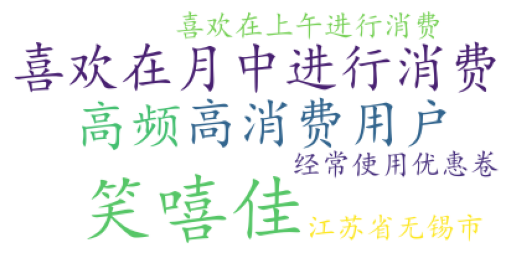

In [30]:
WC_plot(df_profile, '笑嘻佳')

### 用户优惠卷发放模型

In [31]:
##因为发放优惠卷是一个0 1问题，所以我们采用分类预测模型，通过朴素贝叶斯，逻辑回归，决策树三种模型对比模型效果，选择最优模型
##因为数据大多数用户进购买一次，并且使用优惠卷和不使用优惠卷的人相差比较大，所以我们为了保证有正负样本
##我们认为使用优惠卷为正样本，未使用和未领取为负样本，所以在正样本和负样本中，按照训练和测试数据8:2例随机抽取

## 抽取数据

In [32]:
df_N = df[df['使用状态'] == 1]
df_Y = df[df['使用状态'].isin([0,-1]) ]
#因为正样本和负样本数量差距过大
#为了保持正负样本数量平均，采取将负样本复制的策略来解决数据不平衡
df_FA = df_Y
for i in range(26):
    df_FA = pd.concat([df_FA,df_Y],axis = 0)

In [33]:
df_over = pd.concat([df_FA,df_N],axis=0)
df_city = df_city[:10]
df_over['用户所在地'] = df_over['省份'].apply(lambda x : 1 if x in list(df_city['省份']) else 0)

In [34]:
df_over.drop(['省份','城市'],axis = 1,inplace=True)
df_over.drop(['邮费','未领取优惠卷占比'],axis = 1)
df_over.drop('订单ID',axis = 1,inplace=True)

In [35]:
df_over['使用状态'].replace(-1,0,inplace=True)

In [36]:
#对最终的数据进行抽样
df_over.reset_index(inplace=True)
df_over.fillna(0,inplace=True)
target = df_over['使用状态']
train = train = df_over.drop(['使用状态','用户ID','付款日期','index','用户使用优惠卷情况','商家ID'],axis=1)

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#归一化
stdScaler = StandardScaler()
X =stdScaler.fit_transform(train)
X_train,X_test,Y_train,Y_test = train_test_split(train,target,test_size= 0.2,random_state=0)
#朴素贝叶斯模型
#训练和模型验证
clf = GaussianNB().fit(X_train,Y_train)
clf.score(X_test,Y_test)

ImportError: DLL load failed: 找不到指定的程序。

In [ ]:
#决策树模型
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

In [ ]:
#Logistic回归
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial').fit(X_train,Y_train)
clf.score(X_test,Y_test)

In [ ]:
#K近邻分类模型
from sklearn.neighbors import KNeighborsClassifier

clf =KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train)
clf.score(X_test,Y_test)

In [ ]:
#LightGBM,集成学习
'''
import lightgbm as lgb

train_matrix = lgb.Dataset(X_train,label = Y_train)
test_matrix = lgb.Dataset(X_test,label = Y_test)
params = {
    'boosting_type':'gbdt',
    #'boosting_type':'dart',
    'objective':'multiclass',
    'metric':'multi_logloss',
    'min_child_weight':1.5,
    'num_leaves':2**5,
    'lambda_12':10,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'colsample_bylevel':0.7,
    'learning_rate':0.03,
    'tree_method':'exact',
    'seed':2017,
    "num_class":2,
    'silent':True
}
num_round = 1000
early_stopping_rounds = 100
model = lgb.train(params,train_matrix,num_round,valid_sets=test_matrix,early_stopping_rounds=early_stopping_rounds)
pre = model.predict(te_x,num_iteration=model.best_iteration)
'''